In [19]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


nltk.download('punkt') # se usa para descargar las funciones de tokenizacion
nltk.download('stopwords') # Descarga una lista de palabras que no aportan significado al texto 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
data = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
#Cargamos el archivos de csv para crear el DataFrame

In [21]:
words = [] # Creamos la lista para almacenar las palabras procesadas de cada oracion 
stop_words = set(stopwords.words('english')) # se crea la lista para las palabras que no nos interesan 
stemmer = PorterStemmer() # LO utilizamos para reducir las palabras a su raiz o base lexica 

In [22]:
for review in data['reviewText']:
    for sentence in sent_tokenize(review): # Se divide cada reseña en oraciones 
        for word in word_tokenize(sentence): # Se divide cad aoracion en palabras 
            word = word.lower() #Convierte cada palabra en minuscula 
            if word.isalpha() and word not in stop_words: #Filtra las palabras 
                words.append(stemmer.stem(word)) # Agrega las palabras procesadas a la lista word 

In [23]:
text = ' '.join(words) # Se construye la nube de palabras 
wordcloud = WordCloud(
    width=800, height=800, background_color='#E6E6FA',
     stopwords=STOPWORDS, relative_scaling=0, min_font_size=10).generate(text)

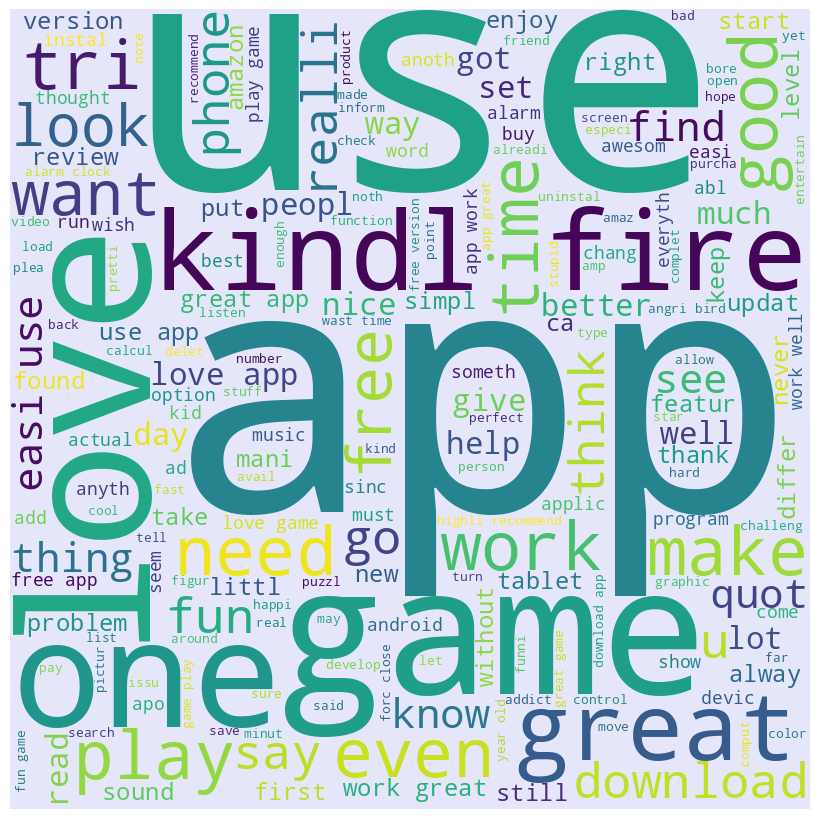

In [25]:
plt.figure(figsize=(8,8), facecolor=None) # Se imprime la nube de puntos 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

En conclusion despues hacer los procesos de filtro y selecccion de palabras obtenemos las palabras mas significativas de nuestro DataFrame.
